   # Credit Card Fraud Detection Project By - Amlendra Sharma

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Sklearn Library
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm

## Importing the dataset

In [2]:
df = pd.read_csv("creditcard.csv")

## Analysis of data

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.shape

(284807, 31)

## Data Manipulation

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.isnull().sum()*100/len(df)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [10]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [12]:
legit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [14]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [15]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Checking the Skewness

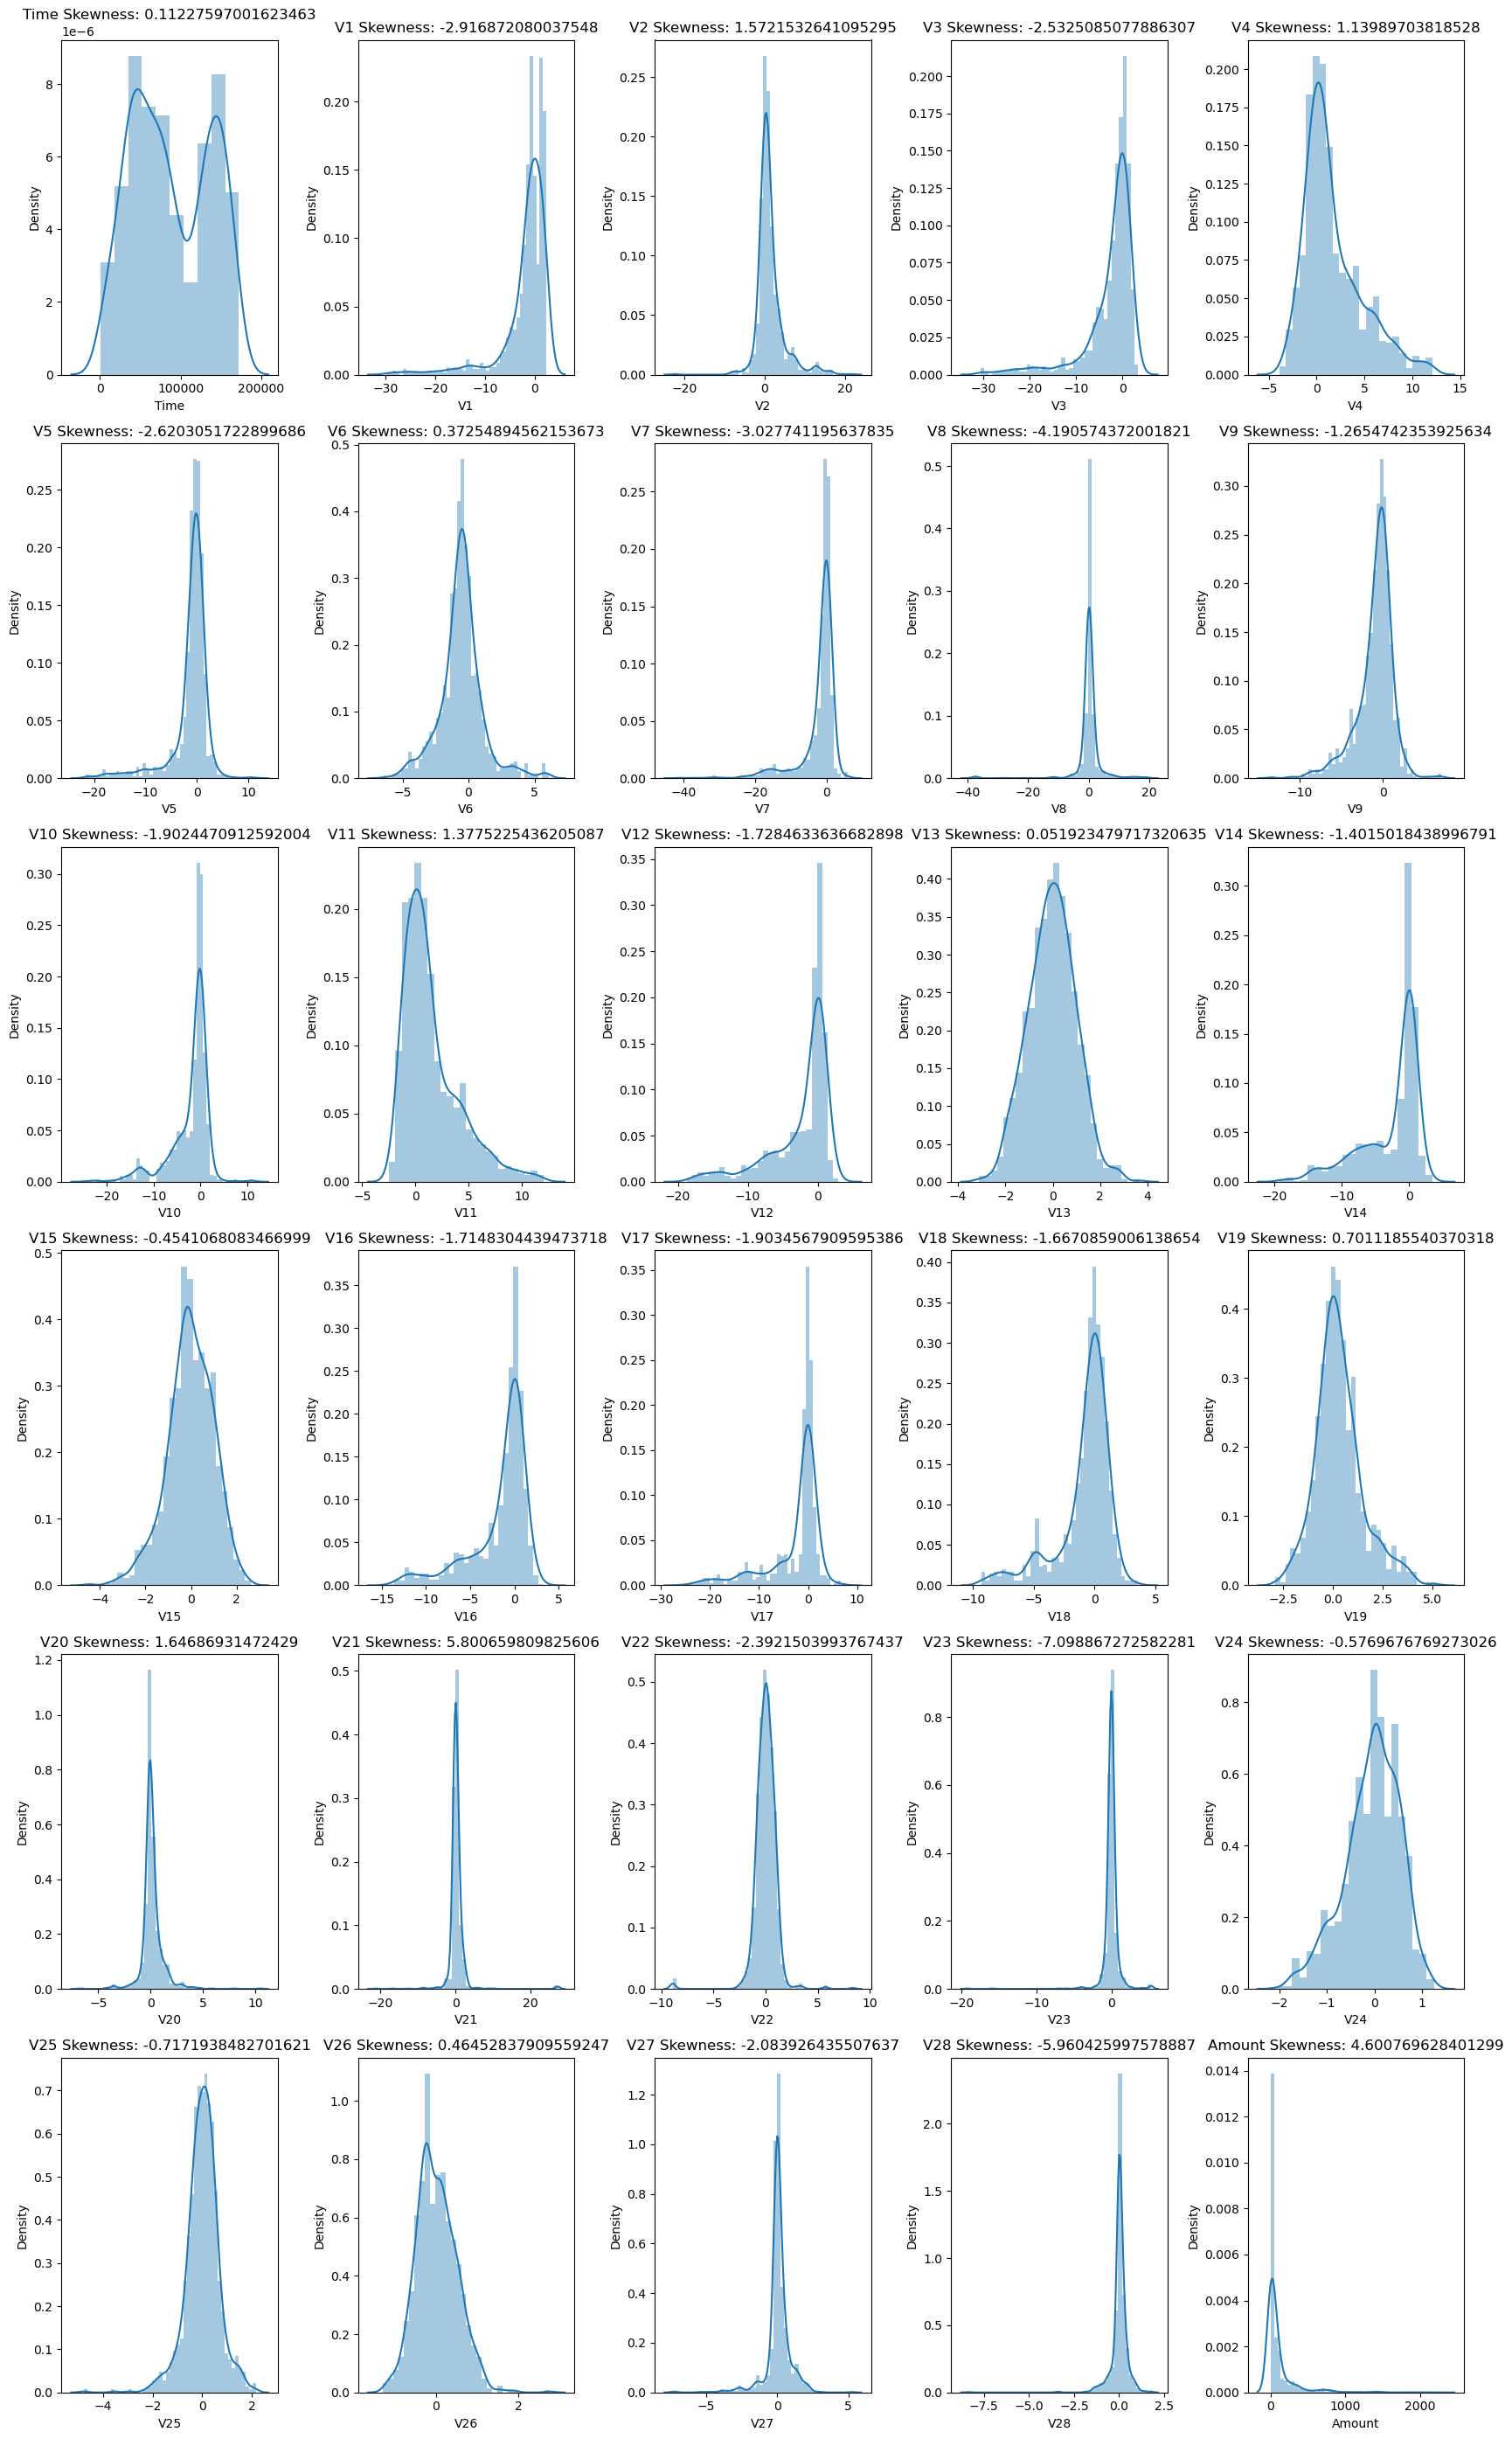

In [141]:
# Plotting the distribution of the variables (skewness) of all the columns
cols = X_train.columns

k = 0
plt.figure(figsize=(17, 28))

for col in cols:
    k = k + 1
    plt.subplot(6, 5, k)
    sns.distplot(X_train[col])
    plt.title(col + ' Skewness: ' + str(X_train[col].skew()))

plt.tight_layout()
plt.show()

## Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

In [18]:
legit_sample = legit.sample(n=800)

In [19]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [20]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
93621,64514.0,1.300023,-0.108409,0.040340,0.576001,-0.035805,0.213527,-0.207965,0.024570,0.807260,...,-0.200246,-0.373416,-0.245082,-0.960309,0.716603,0.498066,-0.020813,-0.001148,17.24,0
195010,130859.0,-0.973771,0.467734,-0.397485,0.871680,1.794883,-0.867646,1.295229,-0.371978,-1.170879,...,0.186283,0.917024,0.129310,-0.397111,0.099272,-0.373478,0.072381,0.107842,21.40,0
237710,149362.0,-3.034101,-2.912282,-2.154602,-0.253546,3.288158,-1.724612,0.669100,0.213826,-1.123499,...,0.801849,0.662323,-0.062925,-0.092205,1.227538,0.429818,-0.262025,-0.633910,263.00,0
257745,158324.0,-0.721791,0.613063,1.028120,-0.410109,-0.063041,0.228149,0.160910,-0.712502,0.740607,...,0.990917,0.812536,-0.109649,-0.624838,-0.063541,-0.051723,0.539987,0.211001,59.78,0
167639,118813.0,-1.685210,-0.693378,1.345885,3.858239,2.753461,-0.440143,-0.585359,0.392254,-1.672962,...,0.343505,0.490297,0.019755,-0.411578,0.068624,0.270730,0.058529,0.173659,7.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [21]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [22]:
new_dataset['Class'].value_counts()

Class
0    800
1    492
Name: count, dtype: int64

In [23]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93531.407500,-0.048389,0.023827,0.039865,-0.081262,-0.011041,-0.045641,0.036059,-0.019035,0.030843,...,0.025502,0.013893,0.018754,-0.011209,-0.025368,0.006109,0.001692,-0.011528,-0.032105,86.727925
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Data Visualuzation

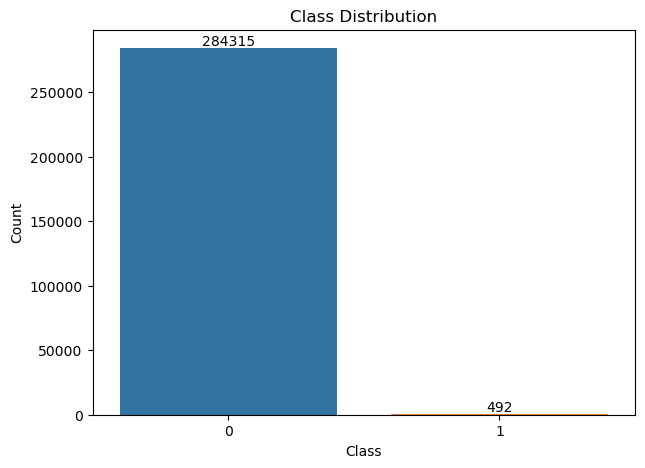

In [24]:
# Class Distribution
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='Class')

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

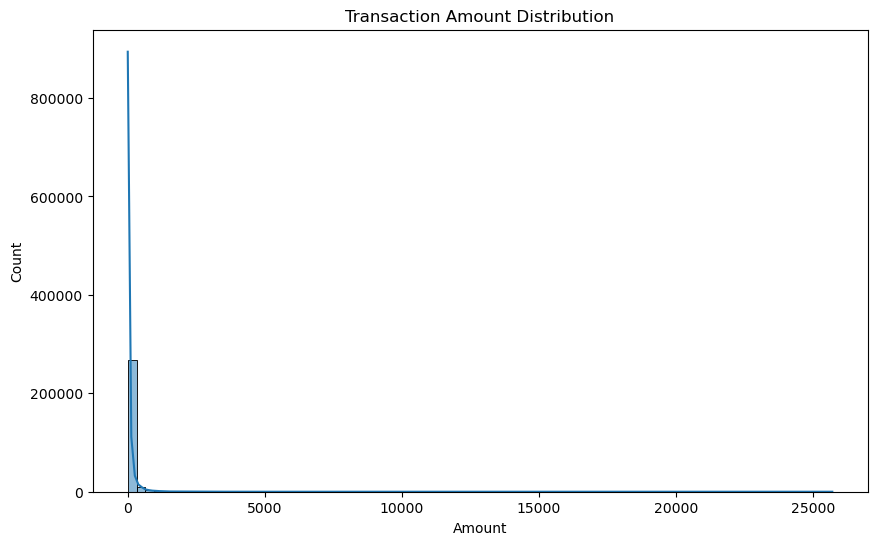

In [25]:
# Transaction Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=80, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

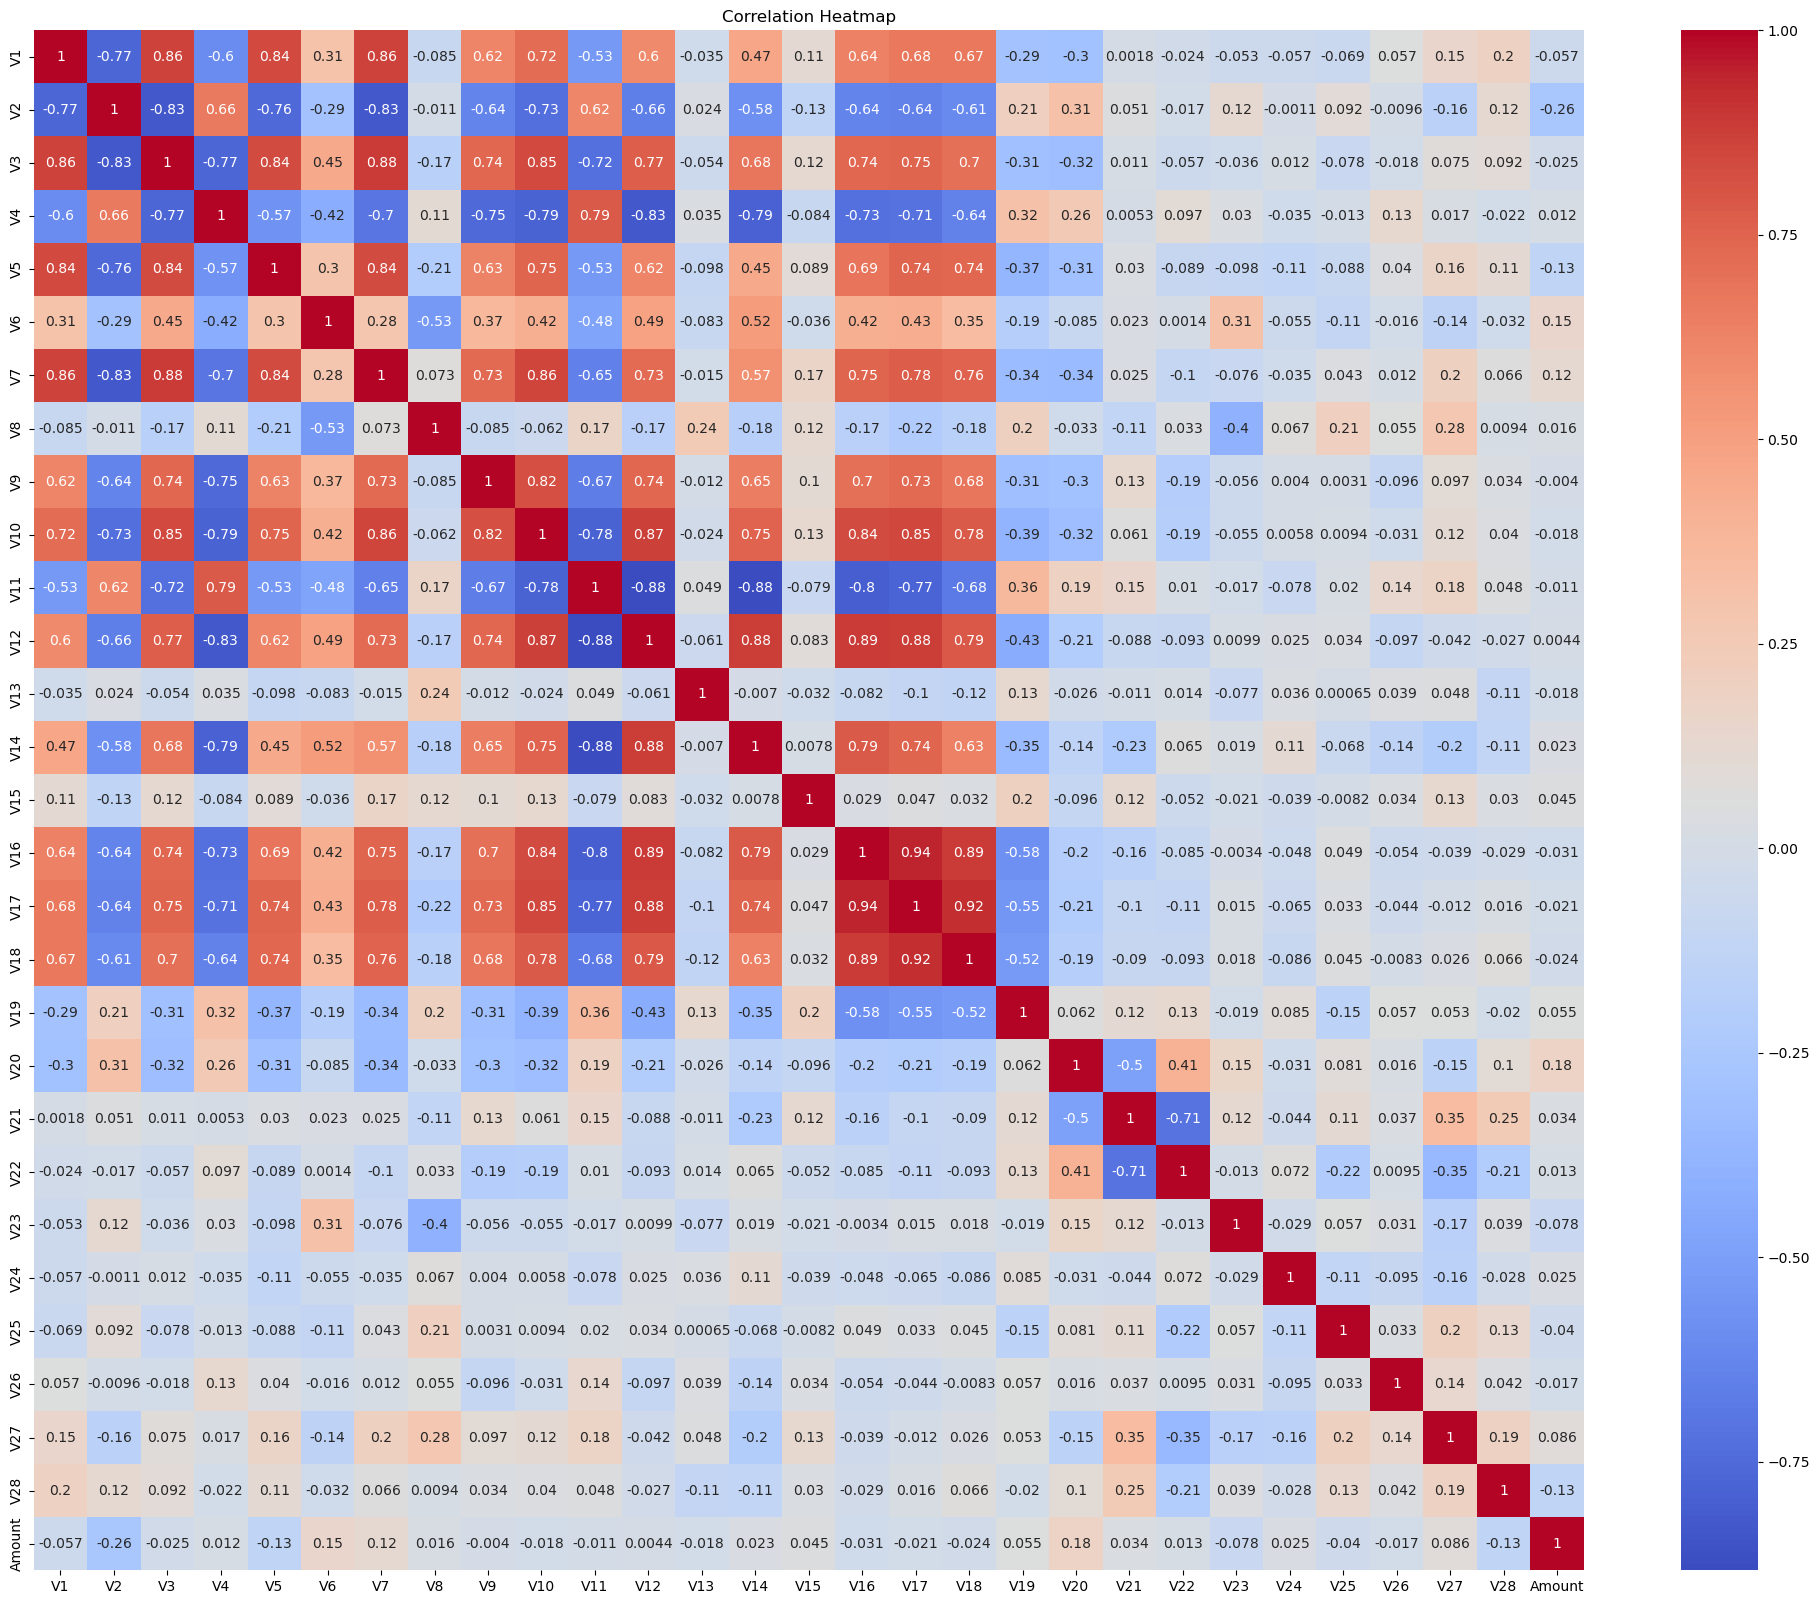

In [26]:
# Correlation Heatmap
correlation_matrix = new_dataset.drop(['Time', 'Class'], axis=1).corr()

plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

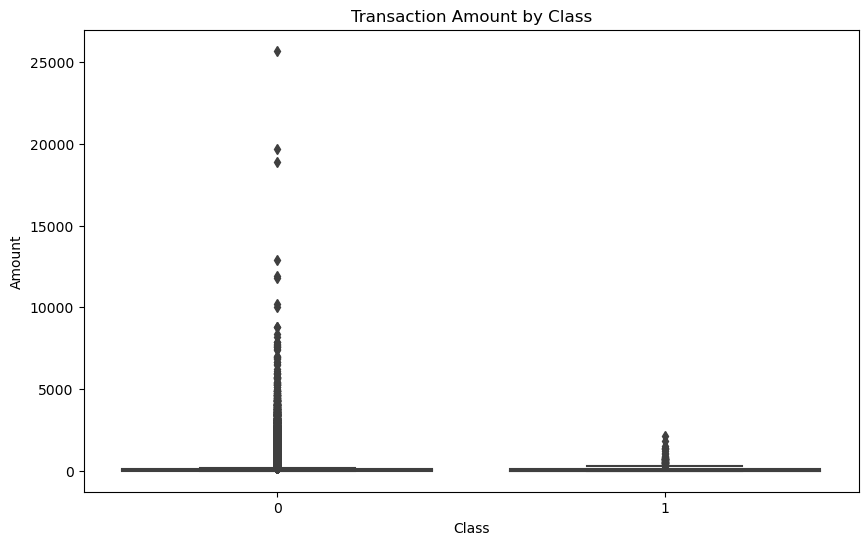

In [27]:
# Fraud vs. Non-Fraud Transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

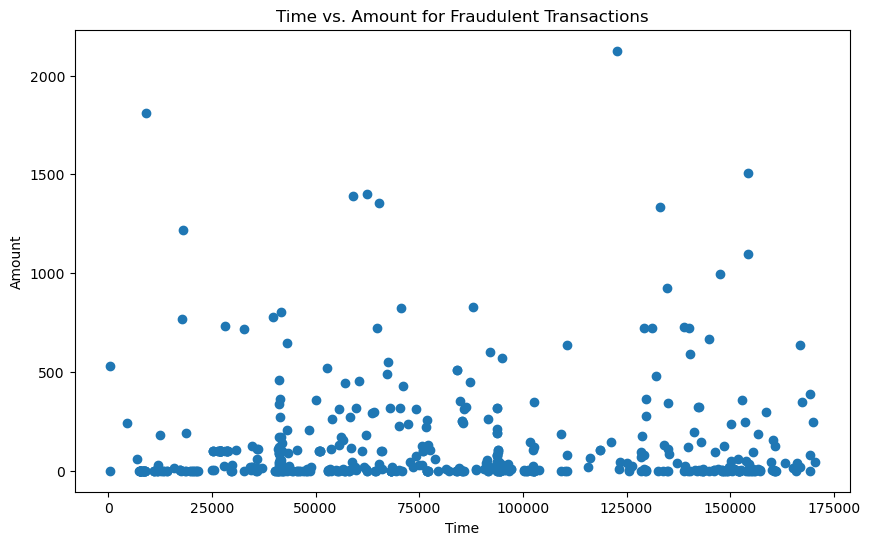

In [28]:
# Time vs. Amount for Fraudulent Transactions
fraudulent_transactions = df[df['Class'] == 1]
plt.figure(figsize=(10, 6))
plt.scatter(fraudulent_transactions['Time'], fraudulent_transactions['Amount'])
plt.title('Time vs. Amount for Fraudulent Transactions')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

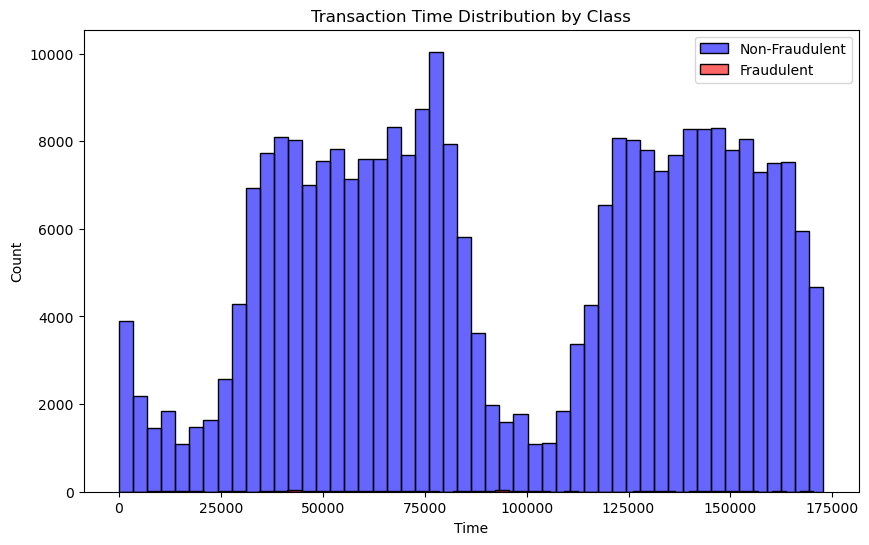

In [29]:
# Time Distribution for Fraudulent and Non-Fraudulent Transactions
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color='b', label='Non-Fraudulent', alpha=0.6)
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color='r', label='Fraudulent', alpha=0.6)
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

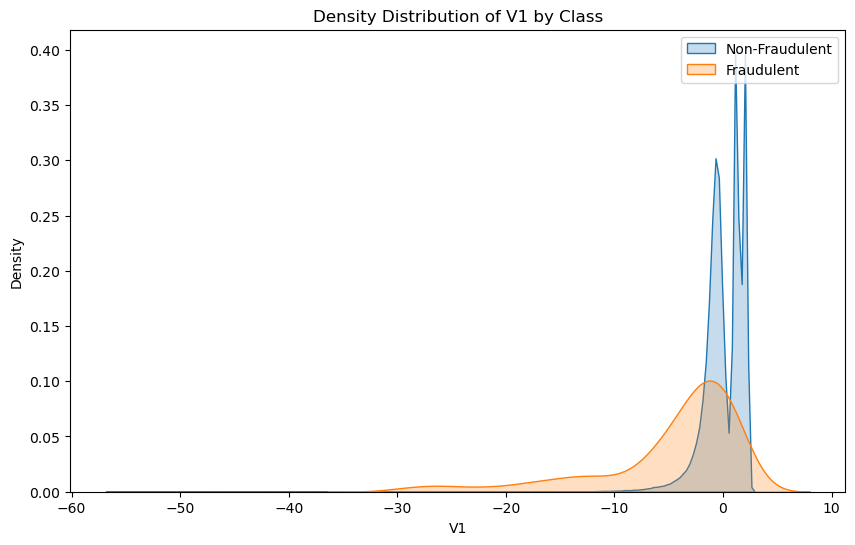

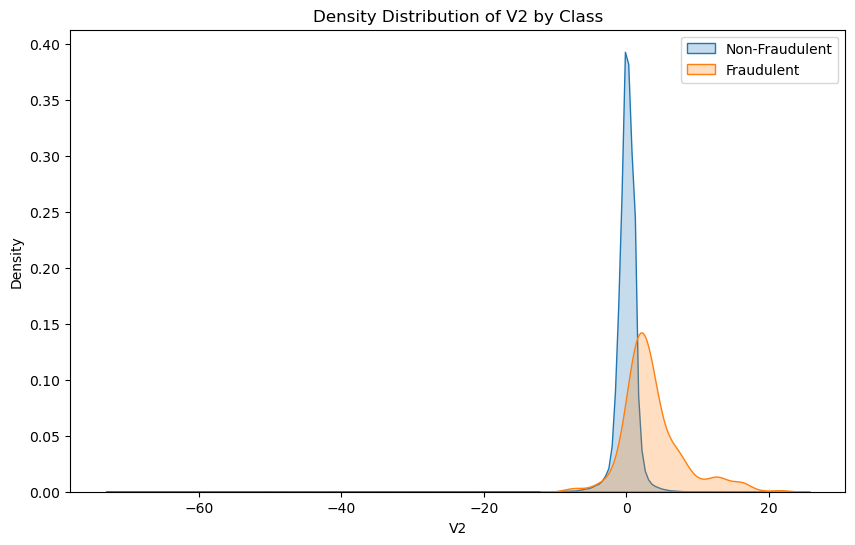

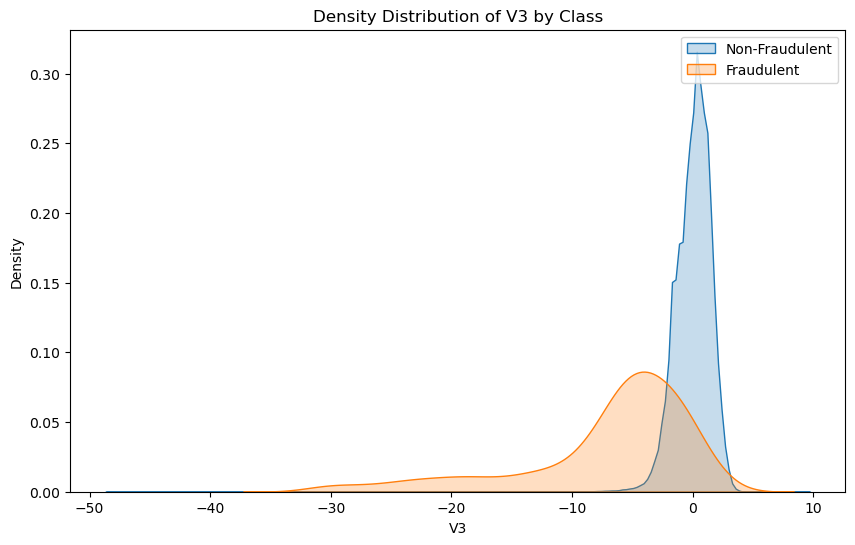

In [30]:
# Density Distribution of Numerical Features for Fraudulent and Non-Fraudulent Transactions
features_to_plot = ['V1', 'V2', 'V3']  # Choose features to plot

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraudulent', shade=True)
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraudulent', shade=True)
    plt.title(f'Density Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

## Train Test Split 

In [31]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(1292, 30) (1033, 30) (259, 30)


In [34]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1292,) (1033,) (259,)


## Model Building

# Logistic Regression Model

In [106]:
model = LogisticRegression()

In [107]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [108]:
model.coef_

array([[-3.11354098e-05,  2.81543482e-01, -5.76154945e-02,
        -5.66368012e-01,  6.54476705e-01,  2.36228978e-01,
        -1.96079446e-01, -1.40252453e-01, -1.35399888e-01,
        -2.24728332e-01, -2.64950521e-01,  5.45005563e-02,
        -3.59922233e-01, -1.39147215e-01, -6.54127626e-01,
        -1.93154780e-01, -2.44651717e-01, -3.27305856e-01,
        -4.54520703e-03, -5.48788190e-02, -1.26887244e-02,
         1.23425731e-01,  7.94223621e-02, -9.18954636e-02,
         1.97656422e-02, -9.55155325e-02, -2.23091069e-02,
        -1.43780965e-02,  8.79276804e-02,  1.01393838e-03]])

In [109]:
model.intercept_

array([-0.30060671])

In [110]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [111]:
print('Accuracy on Training data : ', training_data_accuracy*100)

Accuracy on Training data :  93.99806389157793


In [112]:
# accuracy on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [113]:
print('Accuracy on Testing data : ', testing_data_accuracy)

Accuracy on Testing data :  0.9459459459459459


In [114]:
Trainpred = model.predict(X_train)
Testpred = model.predict(X_test)

In [115]:
print(sm.classification_report(Y_train,Trainpred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       640
           1       0.94      0.90      0.92       393

    accuracy                           0.94      1033
   macro avg       0.94      0.93      0.94      1033
weighted avg       0.94      0.94      0.94      1033



In [116]:
print(sm.classification_report(Y_test,Testpred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       160
           1       0.98      0.88      0.93        99

    accuracy                           0.95       259
   macro avg       0.95      0.93      0.94       259
weighted avg       0.95      0.95      0.95       259



# Model Evaluation

### Accuracy Score of Best Model 

In [117]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [118]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9399806389157793


In [119]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [120]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9459459459459459


## AUC-ROC Curve and AUC-ROC Score

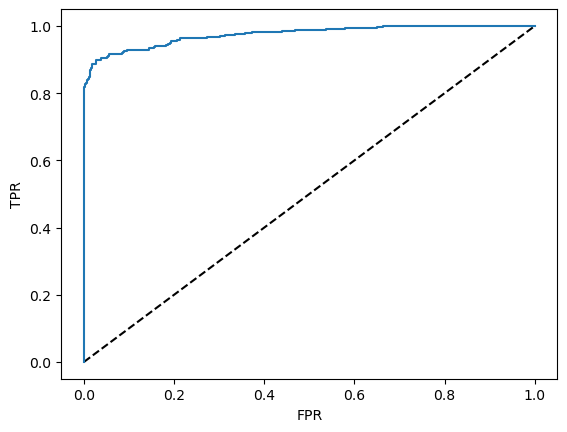

In [121]:
roc = model.predict_proba(X_train)[:,1]
fpr,tpr,threshold = sm.roc_curve(Y_train,roc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='logistic')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

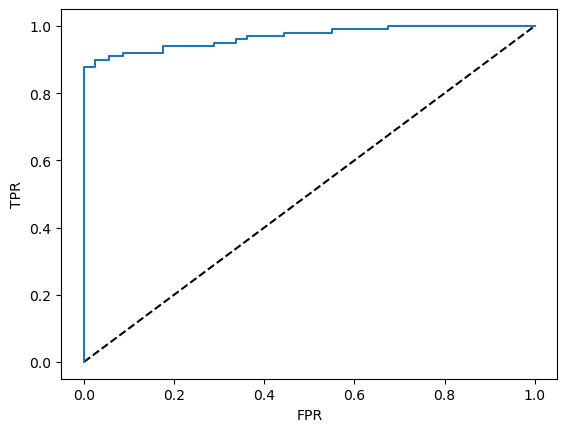

In [122]:
roc1 = model.predict_proba(X_test)[:,1]
fpr,tpr,threshold = sm.roc_curve(Y_test,roc1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='logistic')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [123]:
sm.roc_auc_score(Y_train, roc)


0.974594465648855

In [124]:
sm.roc_auc_score(Y_test, roc1)

0.9676767676767677

## Matthew's Correlation of Coefficients

In [125]:
mcc = matthews_corrcoef(Y_test,Testpred)
print(f"MCC : {mcc}")

MCC : 0.8863808452488185


## Confusion Matrix

Confusion Matrix:
 [[158   2]
 [ 12  87]]


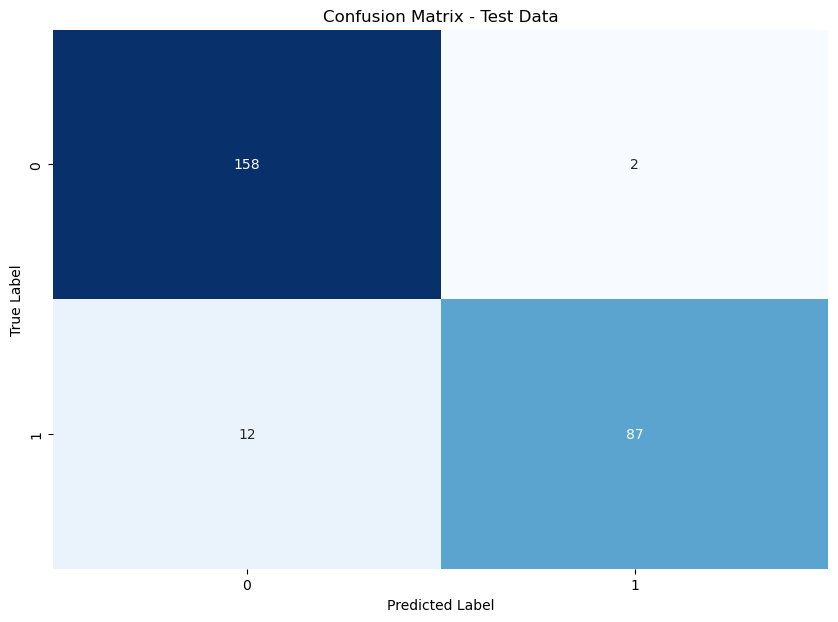

In [126]:
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## GridSearchCV

In [127]:
param_grid = {
    'penalty':['l1','l2'],
    'C': [0.1,0.5,1,5,10],
    'solver': ['liblinear']
}

In [128]:
grid = GridSearchCV(estimator=model , param_grid=param_grid, cv=5)

In [129]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [130]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [131]:
y_pred = best_model.predict(X_test)

In [132]:
acc = accuracy_score(Y_test,y_pred)
pre = precision_score(Y_test,y_pred)
rec = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)
roc_auc = roc_auc_score(Y_test,y_pred)

In [133]:
print(f'''
Best param :{best_param}
Accuracy: {acc}
Precision: {pre}
Recall: {rec}
f1 score: {f1}
AUC-ROC: {roc_auc}
''')


Best param :{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9459459459459459
Precision: 0.9775280898876404
Recall: 0.8787878787878788
f1 score: 0.9255319148936169
AUC-ROC: 0.9331439393939395



## RandomizedSearchCV

In [134]:
param_dist = {
    'C': [0.1,0.5,1,5,10],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty (lasso and Ridge)
    'solver': ['liblinear']  # Algorithm to use in the optimization problem
}

In [135]:
random = RandomizedSearchCV(model, param_distributions=param_dist,cv=5)

In [136]:
random.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.5, 1, 5, 10],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']})

In [137]:
best_param = random.best_params_
best_model = random.best_estimator_

In [138]:
y_pred = best_model.predict(X_test)

In [139]:
acc = accuracy_score(Y_test,y_pred)
pre = precision_score(Y_test,y_pred)
rec = recall_score(Y_test,y_pred)
f1 = f1_score(Y_test,y_pred)
roc_auc = roc_auc_score(Y_test,y_pred)

In [140]:
print(f'''
Best param :{best_param}
Accuracy: {acc}
Precision: {pre}
Recall: {rec}
f1 score: {f1}
AUC-ROC: {roc_auc}
''')


Best param :{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.5}
Accuracy: 0.9498069498069498
Precision: 0.9777777777777777
Recall: 0.8888888888888888
f1 score: 0.931216931216931
AUC-ROC: 0.9381944444444444

